Trainset: 1000
input shape:  torch.Size([1, 3, 256, 256])
label2 shape:  torch.Size([1, 2, 256, 256])


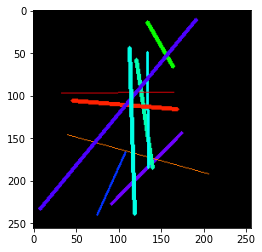

In [70]:
from helpers import helper
import sys
sys.path.append('../')
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
])

class TrainingDatasets(Dataset):
    def __init__(self, Inputs, Labels, Transform):
        self.fnames = Inputs
        self.transform = Transform
        self.labels = Labels         
        
    def __len__(self):
        return len(self.fnames)

    # Returns the tensor image and corresponding label in a tuple
    def __getitem__(self, index):       
        # read input and convert to RGB
        input = cv2.imread(self.fnames[index])
        input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)

        # read label and convert to HSV, then to label_xy
        label = cv2.imread(self.labels[index])
        label = cv2.cvtColor(label, cv2.COLOR_BGR2HSV)
        label_xy = helper.convertHSVtoXY(label)

        return self.transform(input), self.transform(label_xy)

# return dataset and dataloader    
def getData(path_to_csv, batch_size=1):
    df = pd.read_csv(path_to_csv)
    inputs = df['input_path'].values
    labels = df['label_path'].values
    dataset = TrainingDatasets(inputs, labels, transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataset, dataloader


if __name__ == '__main__':
    trainset, train_dl = getData('../../datasets/train.csv', batch_size=1)
    print('Trainset:', len(trainset))
    for images, labels in train_dl:
        print('input shape: ', images.shape)
        print('label2 shape: ', labels.shape)
        break

    label_HSV = helper.convertXYtoHSV(labels[0].permute(1,2,0).numpy())
    plt.imshow(cv2.cvtColor(label_HSV, cv2.COLOR_HSV2RGB))

        
        